In [139]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt

In [140]:
def my_new_model(vec_p, vec_n, vec_x2, vec_x3, vec_tar, start_w = None, start_b = None, start_beta = None):
  # defining functions needed throughout
  def logistic(x):
    return 1/ (1+np.exp(-x))



  #### firstly we need to initialise all our parameters

  ## initialising weights

  if start_w is None:
    [w11, w21, w31, w12, w22, w32, w1, w2, w3] = np.random.uniform(low = -1/np.sqrt(2), high = 1/np.sqrt(2), size = (9,)).tolist()
    [b1, b2, b3, b4] = [0, 0, 0, 0]
    [beta0, beta1, beta2, beta3] = [0, 0, 0, 0]
  else:
    [w11, w21, w31, w12, w22, w32, w1, w2, w3] = start_w
    [b1, b2, b3, b4] = start_b
    [beta0, beta1, beta2, beta3] = start_beta


  for i in range(len(vec_p)):

      # look at current sample
      p = vec_p[i]
      n = vec_n[i]
      x2 = vec_x2[i]
      x3 = vec_x3[i]
      tar = vec_tar[i]


      ## feed forward process

      # first layer

      nh1 = p * w11 + n * w12 + b1
      nh2 = p * w21 + n * w22 + b2
      nh3 = p * w31 + n * w32 + b3

      oh1 = logistic(nh1)
      oh2 = logistic(nh2)
      oh3 = logistic(nh3)

      # second layer

      no1 = oh1 * w1 + oh2 * w2 + oh3 * w3 + b4
      oo1 = logistic(no1)

      # classification layer

      nc = beta0 + beta1 * oo1 + beta2 * x2 + beta3 * x3
      oc = logistic(nc)




      ## computing the loss to be able to see its progression
      Loss = - (tar * np.log(oc) + (1-tar) * np.log(1-oc))
      # print(Loss)



      ## backpropagation process

      # computing the gradients

      # for classification layer

      dldbeta0 = oc - tar
      dldbeta1 = dldbeta0 * oo1
      dldbeta2 = dldbeta0 * x2
      dldbeta3 = dldbeta0 * x3

      # for second layer

      dldb4 = dldbeta0 * beta1 * oo1 * (1 - oo1)
      dldw1 = dldb4 * oh1
      dldw2 = dldb4 * oh2
      dldw3 = dldb4 * oh3

      # for first layer

      dldb1 = dldb4 * w1 * oh1 * (1 - oh1)
      dldb2 = dldb4 * w2 * oh2 * (1 - oh2)
      dldb3 = dldb4 * w3 * oh3 * (1 - oh3)

      dldw11 = dldb1 * p
      dldw21 = dldb2 * p
      dldw31 = dldb3 * p
      dldw12 = dldb1 * n
      dldw22 = dldb2 * n
      dldw32 = dldb3 * n


      # update all parameters

      mu = 0.01 #### learning rate

      beta0 -= mu * dldbeta0
      beta1 -= mu * dldbeta1
      beta2 -= mu * dldbeta2
      beta3 -= mu * dldbeta3

      b4 -= mu * dldb4
      w1 -= mu * dldw1
      w2 -= mu * dldw2
      w3 -= mu * dldw3

      b1 -= mu * dldb1
      b2 -= mu * dldb2
      b3 -= mu * dldb3
      w11 -= mu * dldw11
      w21 -= mu * dldw21
      w31 -= mu * dldw31
      w12 -= mu * dldw12
      w22 -= mu * dldw22
      w32 -= mu * dldw32

  return [w11, w21, w31, w12, w22, w32, w1, w2, w3], [b1, b2, b3, b4], [beta0, beta1, beta2, beta3]


In [141]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [142]:
X_train = pd.read_csv('/content/drive/My Drive/x_train.csv')
X_test = pd.read_csv('/content/drive/My Drive/x_test.csv')

y_train = pd.read_csv('/content/drive/My Drive/y_train.csv')
y_test = pd.read_csv('/content/drive/My Drive/y_test.csv')

In [143]:
how_many_iterations = 1000

In [144]:
vec_w, vec_b, vec_beta = my_new_model(X_train['Feature_1_P'].to_list(), X_train['Feature_1_N'].to_list(), X_train['Feature_2'].to_list(), X_train['Feature_3'].to_list(), y_train['target'].to_list())
for index in range(how_many_iterations-1):
  vec_w, vec_b, vec_beta = my_new_model(X_train['Feature_1_P'].to_list(), X_train['Feature_1_N'].to_list(),
                                        X_train['Feature_2'].to_list(), X_train['Feature_3'].to_list(),
                                        y_train['target'].to_list(),
                                        start_w = vec_w, start_b = vec_b, start_beta = vec_beta)


In [145]:
def prediction_my_model(vec_w, vec_b, vec_beta, vec_p, vec_n, vec_x2, vec_x3):
  # defining functions needed throughout
  def logistic(x):
    return 1/ (1+np.exp(-x))


  ## we need the optimised parameters

  [w11, w21, w31, w12, w22, w32, w1, w2, w3] = vec_w
  [b1, b2, b3, b4] = vec_b
  [beta0, beta1, beta2, beta3] = vec_beta

  # vector to store predicted values
  y_pred = np.zeros((len(vec_p),))
  prod_pred = np.zeros((len(vec_p),))

  for i in range(len(vec_p)):

      # look at current sample
      p = vec_p[i]
      n = vec_n[i]
      x2 = vec_x2[i]
      x3 = vec_x3[i]


      # first layer

      nh1 = p * w11 + n * w12 + b1
      nh2 = p * w21 + n * w22 + b2
      nh3 = p * w31 + n * w32 + b3

      oh1 = logistic(nh1)
      oh2 = logistic(nh2)
      oh3 = logistic(nh3)

      # second layer

      no1 = oh1 * w1 + oh2 * w2 + oh3 * w3 + b4
      oo1 = logistic(no1)

      # classification layer

      nc = beta0 + beta1 * oo1 + beta2 * x2 + beta3 * x3
      oc = logistic(nc)

      if oc > 0.5:
        y_pred[i,] = 1
      else:
        y_pred[i,] = 0

      prod_pred[i,] = oc


  return y_pred, prod_pred

In [146]:
y_pred, prod_pred = prediction_my_model(vec_w, vec_b, vec_beta, X_test['Feature_1_P'].to_list(), X_test['Feature_1_N'].to_list(), X_test['Feature_2'].to_list(), X_test['Feature_3'].to_list())

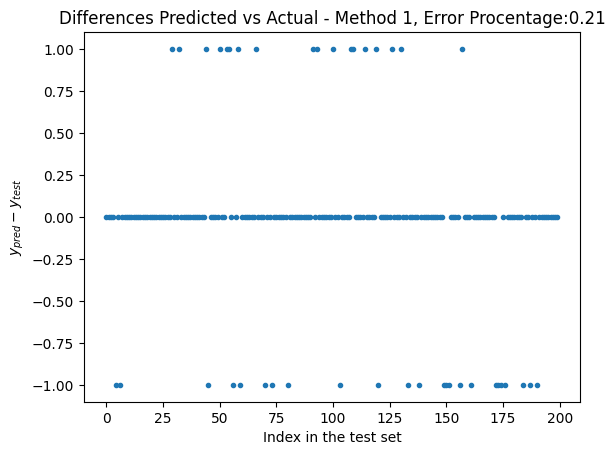

In [147]:
y_pred-np.array(y_test['target'].to_list())

plt.plot(y_pred - np.array(y_test['target'].to_list()),'.')
plt.title('Differences Predicted vs Actual - Method 1, Error Procentage:'+str(sum(np.abs(y_pred-np.array(y_test['target'].to_list())))/len(y_pred)))
plt.xlabel('Index in the test set')
plt.ylabel('$y_{pred} - y_{test}$')
plt.show()


In [148]:
prod_pred

array([0.07602721, 0.62517355, 0.14381009, 0.25816981, 0.36915581,
       0.94784079, 0.46826359, 0.5678056 , 0.59736507, 0.9888411 ,
       0.81448386, 0.27798282, 0.39112881, 0.99294315, 0.13391123,
       0.25316322, 0.73449418, 0.98866014, 0.87337479, 0.94988721,
       0.98189075, 0.27192602, 0.9945289 , 0.87559955, 0.73432551,
       0.87342061, 0.06487549, 0.19100417, 0.83454054, 0.58072797,
       0.0424051 , 0.5673336 , 0.7420289 , 0.97306055, 0.98653903,
       0.84982398, 0.03015661, 0.20339181, 0.20907509, 0.08579975,
       0.53404332, 0.67813935, 0.96912041, 0.8165226 , 0.65852987,
       0.0670385 , 0.03494339, 0.0129789 , 0.15432288, 0.06428741,
       0.51327224, 0.96703748, 0.7269854 , 0.88358935, 0.76173519,
       0.02343393, 0.43723788, 0.94915864, 0.66102678, 0.45876586,
       0.49761076, 0.25872265, 0.70304469, 0.07121645, 0.89586508,
       0.99147602, 0.71115441, 0.74738183, 0.02437718, 0.07764696,
       0.43718744, 0.92884836, 0.14125518, 0.3186685 , 0.41002

In [149]:
y_pred

array([0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1.,
       0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1.,
       0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

In [150]:
y_test

,target
0,0.0
1,1.0
2,0.0
3,0.0
4,1.0
...,...
195,0.0
196,1.0
197,0.0
198,1.0
